## Suport Vector Machines
Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classfication). 

The following will include the following sections:

* Introduction to Support Vector Machines
* SVM General Explanation
* Computing the Hyperplane
* SVM with SciKit Learn
* Additional Resources

## Introduction to Support Vector Machines

Formal Explanation:

In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regresssion analysis. Given a set of training examples, each marked for belonging to one of two categories, and SVM training algorithm builds a model that assigns new examples into one category or the other, mamking it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

The advantages of support vector machines are:

* Effictive in high dimensional spaces
* Still effective in cases where number of dimensions is greater than the number of samples
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels(In machine learning, kernel methods are a class of algorithms for pattern analysis, whose best known member is the support vector machine. The general task of pattern analysis is to find and study genreal types of relations in datasets)

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, the method is likely to give poor performances
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (we can see below)

## SVM General Explanation
We'll start by imaging a situation in which we want to seperate a training set with two classes. We have two classes in our set, blue and red. We plot them out in the feature space and we try to place a green line that sepperates both classes.


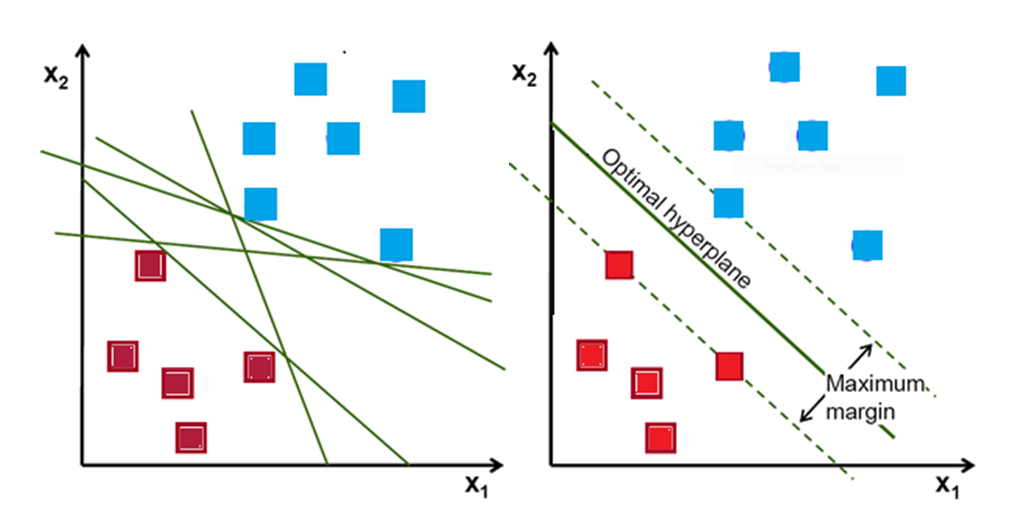

In [5]:
from IPython.display import Image
url = 'https://1.bp.blogspot.com/-NhrPf3gNKrA/XP1sAypX_NI/AAAAAAAAEhk/9aFTX0gUzIEVhbwN1FJYeVze1x1LZqkSACLcBGAs/s1600/svm+images.PNG'
Image(url)

From the image we can see that we have multiple ways of drawing this line (we call this hyperplane 超平面 ) that can seperate the classes completely. 

We decide that the optimal hyperplane that seperates these two classes is the one with the maximum margin between two classes as seen in the right image. We need to mathematically compute that optimatal hyperplane.

### Computing the Hyperplane
Google to review the online mathmatical explanation

### SVM with Sci Kit Learn
Now we are ready to jump to some Python code and Sci Kit Learn

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Note, we won't use seaborn due to a plot at the end

In [10]:
# First we'll start by importing the Data set we are already very familiar with, the Iris Data set

In [17]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Now import the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classification) from the [SVM library of Sci Kit Learn](https://scikit-learn.org/stable/modules/svm.html), check out different types of SVM options in the Sci Kit Learn Documentation!

In [18]:
# Import SVM
from sklearn.svm import SVC

In [21]:
# Fit a SVM model to the data
model = SVC()

In [22]:
from sklearn.model_selection import train_test_split
# Split the data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y)

In [23]:
# Fit the model
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
# Go ahead and see how well the model did
from sklearn import metrics

# Get predictions
predicted = model.predict(X_test)
expected = Y_test

# Compare results
print(metrics.accuracy_score(expected, predicted))

0.9736842105263158


Looks like we have achieved a 97.4% accuracy with Support Vector Classification!

Now that we've gone through a basic implementation of SVM. We'll quickly explore various kernel types we can use for classification. We can do this by plotting out the boundairies created by each kernel type.

The four methods include two linear models, a Gaussian [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function) and a SVC with a polynomial (3rd degree) kernel

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [28]:
# Import all SVM 
from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Now that we have fitted the four models, we will go ahead and begin the process of setting up the visual plots. Note: This example is taken from the Sci Kit Learn Documentation.

First we define a mesh to plot in. We define the max and min of the plot for the y and x axis by the smallest and larget features in the data set. We can use numpy's built in [mesh grid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) method to construct our plot.

In [29]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [30]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

Finally we will go through each model, set its position as a subplot, then scatter the data points and draw a countour of the decision boundaries.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf


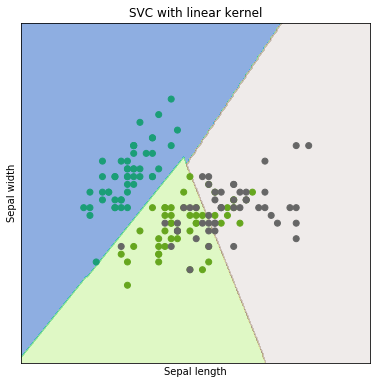

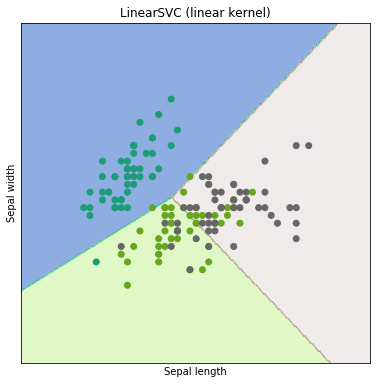

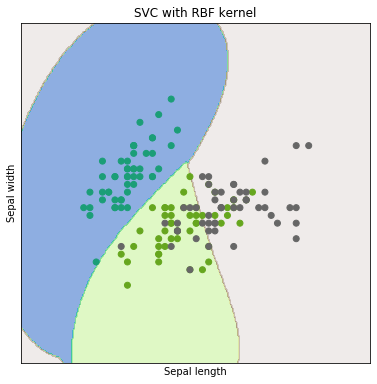

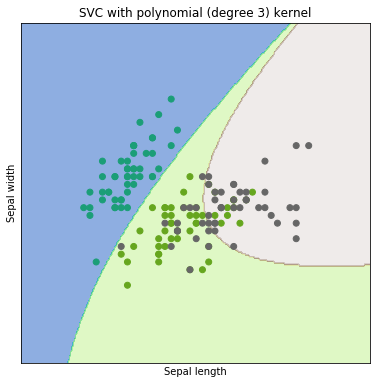

In [31]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()